# Word2Vec Unigram Testing

This Python Notebook is used for evaluation of the Word2Vec Unigram model. The section is broken down as follows:

- Find most similar words from the selected word
- Perform Syntactic Analysis
- Perform Semantic Analysis
- Find uncommon word among a list of words
- Find cosine similarity among two words
- Find the frequency count of a word
- Check if a word is in the model
- Feature vectors of a certain word
- Visualisation of words in Vector Space using TSNE and PCA
- Histogram to showcase distribution of words

In [1]:
from gensim.models import Word2Vec as w2v

C:\Users\MyPC\Anaconda3\lib\site-packages\gensim\utils.py:840: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\MyPC\Anaconda3\lib\site-packages\gensim\utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


In [2]:
# Load Unigram model
FILE = "C:/Users/MyPC/Desktop/Vegito/W2V Models/w2v_reddit_unigram_300d.bin"
model = w2v.load_word2vec_format(FILE, binary=True)

In [3]:
# Cell to find most similar words 
# One word for unigram: dragon, bleach, tottenham
# Two words for bigram: dragon_ball, barack_obama (UNDERSCORE NEEDED + BIGRAM MODEL LOADED)
model.most_similar("neuropsychopharmacology", topn=20)

[('biopsychology', 0.740115225315094),
 ('astrochemistry', 0.7391058206558228),
 ('neuroendocrinologist', 0.7296165227890015),
 ('nanoscience', 0.7265405058860779),
 ('neuropharmacology', 0.7247588038444519),
 ('saltzberg', 0.7157706618309021),
 ('ethnomusicology', 0.7156946659088135),
 ('psychobiology', 0.7154250144958496),
 ('nueroscience', 0.7147186994552612),
 ('neuropsychiatry', 0.7140935659408569),
 ('ichthyology', 0.710540235042572),
 ('molbio', 0.7056220769882202),
 ('oenology', 0.7056138515472412),
 ('antropology', 0.7041956186294556),
 ('biopsych', 0.7037904858589172),
 ('neuroengineering', 0.7037561535835266),
 ('nanoengineering', 0.7024978995323181),
 ('psycholinguistics', 0.7002543210983276),
 ('bioanthropology', 0.6995773315429688),
 ('christmann', 0.698868989944458)]

In [4]:
# Cell for semantic evaluation (Ex. King - man + woman is approximately equal to queen)
model.most_similar(positive=["tokyo","malaysia"], negative=["japan"])

[('lumpur', 0.6737101674079895),
 ('kuala', 0.6668090224266052),
 ('taipei', 0.6401477456092834),
 ('bangkok', 0.6113026142120361),
 ('penang', 0.5809809565544128),
 ('lampur', 0.5752942562103271),
 ('toyko', 0.5550657510757446),
 ('selangor', 0.5511509776115417),
 ('singapore', 0.5502724647521973),
 ('mumbai', 0.5481346249580383)]

In [5]:
# Cell for syntactic evaluation (Ex. walking - walk + swim is approximately equal to swimming)
model.most_similar(positive=["greenish","blue"], negative=["green"])

[('blueish', 0.7298511266708374),
 ('greyish', 0.7232707738876343),
 ('bluish', 0.7149738669395447),
 ('pinkish', 0.705883264541626),
 ('purplish', 0.7028074264526367),
 ('brownish', 0.6946163773536682),
 ('grayish', 0.6922476887702942),
 ('reddish', 0.6911346316337585),
 ('yellowish', 0.6770833134651184),
 ('whitish', 0.6669460535049438)]

In [6]:
# Cell to check which word doesn't match among a group of words
model.doesnt_match("blue green yellow apple".split())

'apple'

In [7]:
# Cell to check similarity among two words
model.similarity("squats","legpress")

0.72445395334591289

In [8]:
# Count number of times a specific word occured in the 2015 Dataset
word = model.vocab['difu']
type(word.count)

int

In [9]:
# Check if word (Unigram) is in model. It is case-sensitive
'Dragon' in model

False

In [10]:
# What does each word actually contain?
model['goku']

array([ 0.10375531,  0.10929207,  0.08830469,  0.01395523, -0.01517171,
        0.00501317, -0.06046121,  0.02743253,  0.02918806,  0.03573068,
       -0.01970761, -0.01276298, -0.02046086,  0.03802621,  0.00047961,
       -0.0017624 , -0.06191385, -0.05035397,  0.08013493, -0.05448005,
       -0.04873396,  0.01874197, -0.06683715, -0.07103707, -0.01683106,
        0.0146693 , -0.06659026, -0.01451557, -0.02147384,  0.00971734,
       -0.03524466, -0.08246868, -0.12978971, -0.04906649, -0.04533923,
        0.13329028,  0.0016056 ,  0.02454429,  0.07700373,  0.03213641,
       -0.03062899,  0.07740682,  0.15522739, -0.00674924, -0.05913823,
       -0.01185566, -0.0377803 , -0.03675865, -0.00894851,  0.06692838,
       -0.04187158,  0.05098331, -0.06255441,  0.03872509, -0.04266021,
        0.08426074,  0.02840355, -0.06466481, -0.04299739, -0.04460176,
        0.01159275, -0.03719337, -0.0315008 , -0.04088448, -0.0624588 ,
       -0.14078555,  0.0181028 ,  0.00725325,  0.13781574,  0.13

In [11]:
# Visualisation (Normal) using TSNE and PCA
# Motivation: http://lvdmaaten.github.io/tsne/
# Motivation: https://golog.co/blog/article/Visualising_high-dimensional_datasets_using_PCA_and_tSNE
# Video: https://www.youtube.com/watch?v=RJVL80Gg3lA

# Firstly: Import the libraries
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import mpld3

sns.set_style("white")

%matplotlib inline

In [12]:
# Create function to return list of words and word embeddings
import random
import pickle

def getEmbeddings(cluster_file, N, word):
    
    # Specify path
    FILE_DICT = "C:/Users/MyPC/Desktop/Vegito/Word Dictionaries/dict_" + str(cluster_file) + "C.pk"
    FILE_CLUS = "C:/Users/MyPC/Desktop/Vegito/K-Means Models/full_" + str(cluster_file) + "C.pk"
    
    # Load the files using pickle
    array_dict_cluster = pickle.load(open(FILE_DICT, "rb"))
    word_centroid_map =  pickle.load(open(FILE_CLUS,"rb"))
    
    # Find index number of word 
    # Then load all related words 
    cluster_num = word_centroid_map[word]
    words_list = array_dict_cluster[cluster_num]['word_list']
    
    # Get index number of searched word
    index_num = words_list.index(word)
    
    # Memory limitations
    if index_num < N:
    
        # Lets get only the first N + 10number of words
        words_list = words_list[:N + 10]
        
    else:
        
        # Get the previous N words 
        words_list = words_list[index_num - N : index_num + 10]
    
    # Initialize array of vectors and words
    vectors = []
    words = []
    
    # Add vector and words
    for word in words_list:
        
        vectors.append(model[word]) 
        words.append(word)
    
    return vectors, words

In [222]:
# Plot a graph to show variance in PCA
def plotPCABar(explained_variance_ratio, threshold):
    
    # Get number of components needed above ratio
    n_comp = 0
    total = 0
    
    for num in explained_variance_ratio:
        if total > threshold:
            break
        else:
            n_comp += 1
            total += num
            
    # Prepare label for vertical line
    label = str(threshold) + '% Variance (' + str(n_comp) + ')'
    
    # Get number of bars to plot
    bar_num = len(explained_variance_ratio)
    
    # Plot using matplotlib
    fig, ax = plt.subplots(figsize=(8, 4))

    ax.bar(range(bar_num), explained_variance, alpha=0.5, align='center',
            label='Individual explained variance', color='red')
    
    # Draw the line where components cross 90% variance
    ax.axvline(x=n_comp, color='g', label = label)
    
    sns.despine()
    sns.set_style("ticks")
    
    ax.set(ylabel = 'Explained variance ratio')
    ax.set(xlabel = 'Principal components')
    
    ax.set_xlim([0, bar_num])
    
    ax.legend(loc='best')
    fig.tight_layout()

In [233]:
from scipy.interpolate import spline
import math

# Function to plot PCA's variance
def plotPCAPlot(wv):
    
    # Use all components (this is the number of dimensions in Word2Vec)
    pca = PCA(n_components = 300)
    pca_result = pca.fit_transform(wv)
    
    # Get explained variance per component
    explained_variance = np.multiply(pca.explained_variance_ratio_, 100.0)
    
    # Get data from components
    n_comp = 0
    total = 0
    
    START = 10
    STOP = 91
    JUMP = 10
    
    y_target = range(START,STOP,JUMP) 
    index = 0
    
    x_val = [0]
    y_val = [0]

    # Loop through
    for num in explained_variance:
            n_comp += 1
            total += num

            # Store for every 20% and increment index
            if round(total) >= y_target[index]:
                
                x_val.append(n_comp)
                y_val.append(round(total))
                index += 1
                
            # 100% reached
            if index == len(y_target): break
        
    # Add last label
    x_val.append(300)
    y_val.append(100)
    
    # Plotting 
    sns.set_style("darkgrid")
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(x_val, y_val, color='green',clip_on=False)
    
    del x_val[0], x_val[-1]
    del y_val[0], y_val[-1]
    ax.scatter(x_val, y_val, color='red', s = 25)
    
    ax.set(ylabel = 'VARIANCE')
    ax.set(xlabel = 'Principal components')
    
    ax.set_xlim([0, 300])
    ax.set_ylim([0, 100])

ENTER WORD: gohan
TOTAL WORDS: 810 
TIME TAKEN (PCA):  0.17362165451049805
VARIANCE:  91.4634579536
TIME TAKEN (TSNE):  5.411288261413574


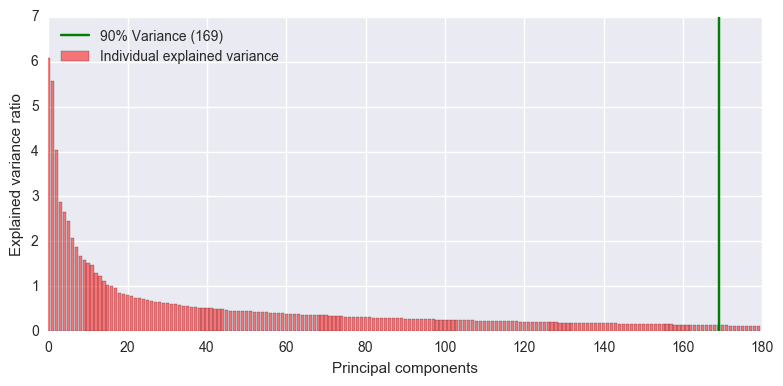

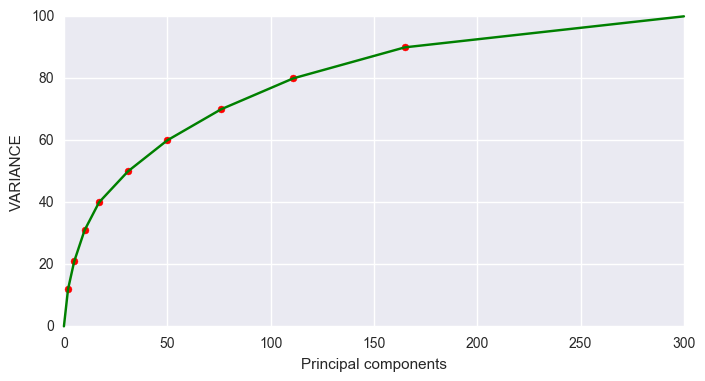

In [235]:
# Display the graph in this cell
import time

# Get the feature vectors and respective words
search_word = input("ENTER WORD: ").lower()
get_words = 800

wv, vocabulary = getEmbeddings(500, get_words, search_word)
print("TOTAL WORDS: %i " % (len(vocabulary)))

# Initialize PCA model
pca = PCA(n_components=180)

start = time.time()
pca_result = pca.fit_transform(wv)
end = time.time()

threshold = 90 # 90 percent of variance is needed

explained_variance=np.multiply(pca.explained_variance_ratio_, 100.0)
plotPCABar(explained_variance, threshold)

print("TIME TAKEN (PCA): ", end-start)

# Get explained variance ratio
explain_ratio = np.sum(pca.explained_variance_ratio_)
print('VARIANCE: ', explain_ratio * 100)

# Initialize TSNE model
tsne = TSNE(n_components=2, random_state=0)

# Fit with TSNE
start = time.time()
Y = tsne.fit_transform(pca_result)
end = time.time()

# Plot Full PCA, displaying variance
plotPCAPlot(wv)

print("TIME TAKEN (TSNE): ", end - start)

# Scatter points
fig, ax = plt.subplots(figsize=(10, 8),subplot_kw={'xticks': [], 'yticks': []})

# Use Scatterplot
ax.scatter(Y[:, 0], Y[:, 1], color="blue")

# Initialize Points
for label, x, y in zip(vocabulary, Y[:, 0], Y[:, 1]):
    
    # Give the searched word a different color
    # Otherwise, all words should be colored red
    color = 'black'
    fontsize = 10
    
    if label == search_word:
        color = 'red'
        fontsize = 20
        
    ax.annotate(label, xy=(x, y), fontsize=fontsize, color=color)

# Display
mpld3.display(fig)

In [15]:
# Function to plot the histogram of word distribution

def plotHistogram(file_cluster):
    
    FILE_DICT = "C:/Users/MyPC/Desktop/Vegito/Word Dictionaries/dict_" + str(file_cluster) + "C.pk"
    array_dict_cluster = pickle.load(open(FILE_DICT, "rb"))

    word_length = []

    # Loop cluster by cluster
    for cluster in array_dict_cluster:

        # Get total words
        total_words = len(cluster['word_list'])

        # Append
        word_length.append(total_words)

    # Plot Histogram
    PADDING = 15
    
    # Get average count and create label
    total = sum(word_length)
    avg_words = round(total/file_cluster)
    label = "Est. Average (" + str(avg_words) + " words)"
    
    sns.set(rc={"figure.figsize": (6,6)})
    sns.set_style("white")
    sns.set_style("ticks")
    sns.set_context("notebook", font_scale=1)

    ax = sns.distplot(word_length, kde=False, color='purple')

    ax.grid(False)
    ax.set(title='Words Distribution in '+ str(file_cluster) + ' Clusters')
    
    plt.axvline(x=avg_words, color='g', label = label)
    plt.xlabel("Total Words", labelpad=PADDING)
    plt.ylabel("Total Clusters", labelpad=PADDING)
    
    plt.xlim(xmin=0)
    plt.legend(loc='center right')
    plt.tight_layout()

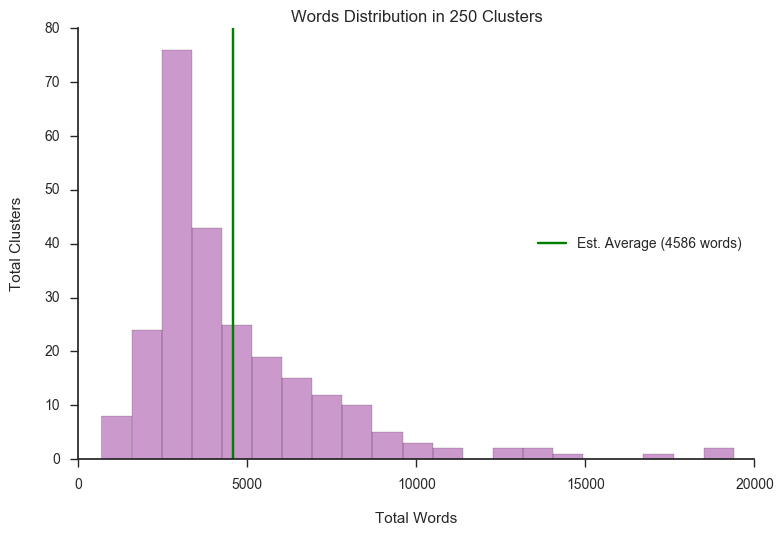

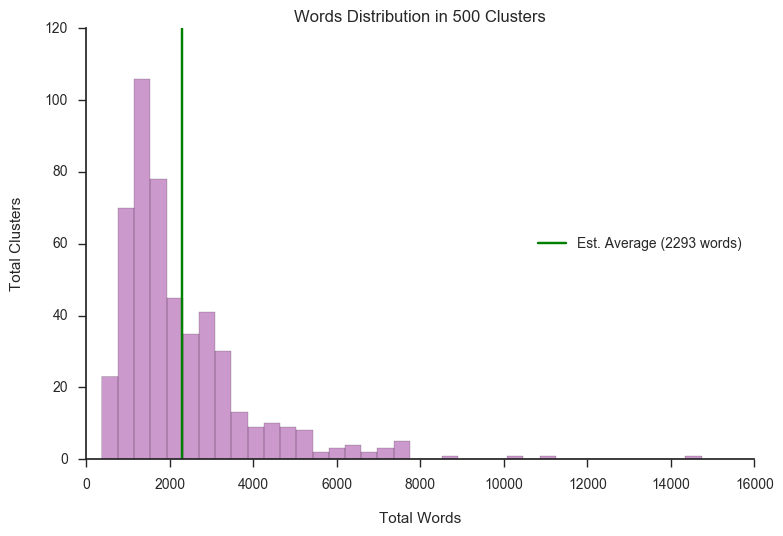

In [16]:
# Call histogram function plot the histograms

mpld3.disable_notebook()
# Array to store number of clusters
clust_array = [250,500]

# Go one by one
for clusters in clust_array:
    
    # Call histogram function
    plotHistogram(clusters)
    sns.despine()
    plt.show()